In [1]:
%matplotlib inline
import pandas as pd, datetime as dt
import collections
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import glob, os

## NOx vs CO2

In [2]:
files_lab = glob.glob('*C.xlsx')                                                   # read all VELA2 files
dic_lab = {}                                                                     # empty dictionary lab tests
                                                                    
#CO2_TA = 179  # g/km, the type-approval for this Audi A1

i = 1
for each in files_lab:
    
    %time df = pd.read_excel(each, sheetname=1, header=0)                          # read the proper sheets within each file
    
    CO2 = df['c_CO2_Dil_g_vec\n[grams]']
    CO2_sum = CO2.sum()
    NOx = df['c_NOx_Dil_g_vec\n[grams]']
    NOx_sum = NOx.sum()
    
    v = df['DACtrl_ActualSpeed\n[kph]']            #group speed by intervals
    t_s = len(df.index)                                                #  time(s)
    t_h = t_s/3600                                                                    # time (hours)
    v_mean = v.mean()                                                  # speed means
    d = v_mean * t_h #b.reset_index(drop=True) * d.reset_index(drop=True)                # distance means
    
    CO2km = CO2_sum/d                                                    # CO2 per km 
    #CO2pct = CO2km*100/CO2_TA                                            # emissions as % of type approval (98 g/km)
    NOxkm = NOx_sum/d                                                    # NOx / km
    
    key = each.split('al_')[1].split('.x')[0]                             # shortening the titles of the files
    
    key = str(i) + "." + str(key)                                        # numbering the files
    dic_lab[key] = [CO2km , NOxkm]                                         # save means in the dictionary
    i = i+1

Wall time: 1.22 s
Wall time: 1.18 s
Wall time: 1.73 s
Wall time: 1.1 s
Wall time: 1.7 s
Wall time: 2.32 s
Wall time: 1.05 s
Wall time: 1.07 s
Wall time: 1.65 s
Wall time: 1.66 s
Wall time: 1.64 s
Wall time: 1.74 s
Wall time: 1.78 s
Wall time: 1.66 s
Wall time: 1.72 s
Wall time: 1.08 s
Wall time: 1.14 s
Wall time: 1.14 s
Wall time: 1.04 s
Wall time: 1.1 s
Wall time: 1.07 s
Wall time: 1.06 s


In [3]:
files_road = glob.glob('*[0-9].xlsx')                                         # read all EMROAD files
dic_road = {}                                                            # empty dictionary road test
#CO2_TA = 98  # g/km, the type-approval for this Audi A1

i = 1
for each in files_road:
    
    %time df = pd.read_excel(each, sheetname='TEST REPORT', header=6)

    df.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)   # convert the headers to read them: ' ' for '_'
    df.rename(columns=lambda x: x.strip().replace(".", "_"), inplace=True)   # convert the headers to read them: '.' for '_'
    
    
    CO2_COMP = df.COMPLETE_TEST['CO2'][1]      # g/km
    #CO2_COMP = CO2_COMP_*100/CO2_TA             # %
    CO2_URB = df.URBAN['CO2'][1]               # g/km
    #CO2_URB = CO2_URB_*100/CO2_TA               # %
    CO2_RUR = df.RURAL['CO2'][1]               # g/km
    #CO2_RUR = CO2_RUR_*100/CO2_TA               # %
    CO2_MOT = df.MOTORW_['CO2'][1]             # g/km
    #CO2_MOT = CO2_MOT_*100/CO2_TA               # %
    #CO2 = [CO2_COMP,CO2_URB,CO2_RUR,CO2_MOT]
    
    NOx_COMP = df.COMPLETE_TEST['NOx'][1]
    NOx_URB = df.URBAN['NOx'][1]
    NOx_RUR = df.RURAL['NOx'][1]
    NOx_MOT = df.MOTORW_['NOx'][1]

    #NOx = [NOx_COMP,NOx_URB,NOx_RUR,NOx_MOT]
    
    key = each.split('7_')[1].split('_E')[0]
    each = str(i) + "_" + str(each)
    dic_road[each] = [CO2_COMP,NOx_COMP,CO2_URB,NOx_URB,CO2_RUR,NOx_RUR,CO2_MOT,NOx_MOT]     # save means in the dictionary
    i = i+1

Wall time: 16.3 s
Wall time: 16.8 s
Wall time: 16.5 s
Wall time: 16.1 s
Wall time: 17.7 s
Wall time: 17.8 s
Wall time: 18.3 s
Wall time: 22.5 s
Wall time: 21.9 s
Wall time: 16.3 s


## Lab

In [4]:
lab = pd.DataFrame()                                                          
lab = lab.from_dict(dic_lab, orient='index')                                  # convert dic to dataframe
lab['ind2'] = ['01','05','08','04','07','08','03','03','08','09',             # proper order
               '09','10','09','07','08','02','06','04','01','05','02','06']
lab.columns = ['CO2_lab','NOx_lab','ind2']                                    # headers
lab['NOx_lab'] = lab['NOx_lab']*1000                                          # change unit to mg/km

In [5]:
lab = lab.sort_values('ind2')

lab['test'] = ['N_CD_23','N_CD_23','N+10%_CD_23','N+10%_CD_23','N_CD_10','N_CD_10',
               'N_CD_30','N_CD_30','N_HT_23','N_HT_23','N_HT_AC18+L_23','N_HT_AC18+L_23',
               'W_CD_23','W_CD_23','W_HT_23','W_HT_23','W_HT_23','W_HT_23',
               'W_LO-7_CD_-7','W_LO-7_CD_-7','W_LO-7_CD_-7','W_LO-7_HT_-7']

lab.columns = ['CO2_lab','NOx_lab','ind2','test']
lab

,CO2_lab,NOx_lab,ind2,test
1.DIL_NEDC_COLD_FWD-sync_23°C,122.380762,16.412852,01,N_CD_23
19.DIL_NEDC_COLD_FWD-sync_23°C,123.602547,17.800825,01,N_CD_23
16.DIL_NEDC+10%Veloc_COLD_FWD-sync_23°C,126.608577,34.072658,02,N+10%_CD_23
21.DIL_NEDC+10%Veloc_COLD_FWD-sync_23°C,125.110670,31.169762,02,N+10%_CD_23
7.DIL_NEDC_COLD_FWD-sync_10°C,133.021860,29.136244,03,N_CD_10
8.DIL_NEDC_COLD_FWD-sync_10°C,130.614367,28.072583,03,N_CD_10
4.DIL_NEDC_COLD_FWD-sync_30°C,120.924973,13.737185,04,N_CD_30
18.DIL_NEDC_COLD_FWD-sync_30°C,117.289548,26.810697,04,N_CD_30
2.DIL_NEDC_HOT_FWD-sync_23°C,110.283987,24.148585,05,N_HT_23
20.DIL_NEDC_HOT_FWD-sync_23°C,115.314096,29.053917,05,N_HT_23


In [6]:
name = lab.groupby(lab.ind2).mean()#.reset_index()#drop = True)
name['test'] = ['N_CD_23','N+10%_CD_23','N_CD_10','N_CD_30','N_HT_23',
                'N_HT_AC18+L_23','W_CD_23','W_HT_23','W_LO-7_CD_-7','W_LO-7_HT_-7']
name.columns = ['CO2_lab','NOx_lab','test']

name

,CO2_lab,NOx_lab,test
ind2,,,
01,122.991654,17.106838,N_CD_23
02,125.859623,32.621210,N+10%_CD_23
03,131.818114,28.604414,N_CD_10
04,119.107261,20.273941,N_CD_30
05,112.799042,26.601251,N_HT_23
06,134.809943,39.419522,N_HT_AC18+L_23
07,135.778850,51.044027,W_CD_23
08,129.394423,50.597036,W_HT_23
09,158.362965,169.999710,W_LO-7_CD_-7


## Road

In [7]:
road = pd.DataFrame()                               # convert dic to dataframe
road = road.from_dict(dic_road, orient='index')             # proper order
road['ALPH'] = ['d','a','b','c','e','f','g','h','i','j']              # indexing by letters
road.columns = ['CO2_COMP','NOx_COMP','CO2_URB','NOx_URB','CO2_RUR','NOx_RUR','CO2_MOT','NOx_MOT','ALPH']  # headers

road['NOx_COMP']=road['NOx_COMP']*1000                  # change unit to mg/km
road['NOx_URB']=road['NOx_URB']*1000                    # change unit to mg/km
road['NOx_RUR']=road['NOx_RUR']*1000                    # change unit to mg/km
road['NOx_MOT']=road['NOx_MOT']*1000                    # change unit to mg/km

road = road.sort_values('ALPH')
road

,CO2_COMP,NOx_COMP,CO2_URB,NOx_URB,CO2_RUR,NOx_RUR,CO2_MOT,NOx_MOT,ALPH
2_VW037_ESP_2017_06_22_EMROAD_Test1.xlsx,160.404365,146.186961,192.645756,122.044649,131.669098,142.544107,145.758477,182.356333,a
3_VW037_ESP_2017_06_23_EMROAD_Test1.xlsx,158.794882,143.058740,194.907117,129.092279,130.408013,163.606003,139.403632,140.633453,b
4_VW037_ESP_2017_06_26_EMROAD_Test2.xlsx,153.689439,118.901791,182.976626,106.801184,120.988352,129.071198,147.548672,125.312103,c
1_VW037_ESD_2017_06_19_EMROAD_Test1.xlsx,174.445802,684.351912,211.658993,672.760615,147.450566,748.650421,155.473969,642.785742,d
5_VW037_LAB_2017_06_13_EMROAD_Test2.xlsx,172.139519,169.885037,210.836465,156.414634,133.940983,172.635710,161.705536,182.553001,e
6_VW037_LAB_2017_06_14_EMROAD_Test1.xlsx,154.660956,147.249148,178.943315,124.474419,130.584887,168.257999,146.650783,155.992393,f
7_VW037_LAD_2017_06_19_EMROAD_Test2.xlsx,172.136948,604.674963,209.022354,660.629181,138.514468,748.143214,161.413932,448.180577,g
8_VW037_MIL_2017_06_21_EMROAD_Test1.xlsx,156.925121,221.869851,168.562615,103.051975,113.411097,170.183508,160.525835,305.571674,h
9_VW037_MIL_2017_06_26_EMROAD_Test1.xlsx,152.135380,179.383210,170.141977,100.263197,111.117491,155.617218,152.291976,229.627498,i
10_VW037_SAC_2017_06_22_EMROAD_Test2.xlsx,173.006348,202.978524,173.062674,203.059479,143.436705,160.479422,NaN,NaN,j


In [8]:
### Reshape index ###
r = road
r.index = r.index.str[8:11]
r

,CO2_COMP,NOx_COMP,CO2_URB,NOx_URB,CO2_RUR,NOx_RUR,CO2_MOT,NOx_MOT,ALPH
ESP,160.404365,146.186961,192.645756,122.044649,131.669098,142.544107,145.758477,182.356333,a
ESP,158.794882,143.058740,194.907117,129.092279,130.408013,163.606003,139.403632,140.633453,b
ESP,153.689439,118.901791,182.976626,106.801184,120.988352,129.071198,147.548672,125.312103,c
ESD,174.445802,684.351912,211.658993,672.760615,147.450566,748.650421,155.473969,642.785742,d
LAB,172.139519,169.885037,210.836465,156.414634,133.940983,172.635710,161.705536,182.553001,e
LAB,154.660956,147.249148,178.943315,124.474419,130.584887,168.257999,146.650783,155.992393,f
LAD,172.136948,604.674963,209.022354,660.629181,138.514468,748.143214,161.413932,448.180577,g
MIL,156.925121,221.869851,168.562615,103.051975,113.411097,170.183508,160.525835,305.571674,h
MIL,152.135380,179.383210,170.141977,100.263197,111.117491,155.617218,152.291976,229.627498,i
_SA,173.006348,202.978524,173.062674,203.059479,143.436705,160.479422,NaN,NaN,j


In [9]:
### Group by index and calculate means ###
r_avg = r.groupby(r.index).mean()#.reset_index()#drop = True)
#r_avg['test'] = ['ESP','LAB','MIL','SAC']
                
r_avg.columns = ['CO2_COMP','NOx_COMP','CO2_URB','NOx_URB','CO2_RUR','NOx_RUR','CO2_MOT','NOx_MOT']

r_avg[['CO2_COMP','NOx_COMP']]

,CO2_COMP,NOx_COMP
ESD,174.445802,684.351912
ESP,157.629562,136.049164
LAB,163.400238,158.567092
LAD,172.136948,604.674963
MIL,154.530250,200.626531
_SA,173.006348,202.978524


In [ ]:
road = pd.DataFrame()                               # convert dic to dataframe
road = road.from_dict(dic_road, orient='index')             # proper order
road['ALPH'] = ['d','a','b','c','e','f','g','h','i','j']              # indexing by letters
road.columns = ['CO2_COMP','NOx_COMP','CO2_URB','NOx_URB','CO2_RUR','NOx_RUR','CO2_MOT','NOx_MOT','ALPH']  # headers

road['NOx_COMP']=road['NOx_COMP']*1000                  # change unit to mg/km
road['NOx_URB']=road['NOx_URB']*1000                    # change unit to mg/km
road['NOx_RUR']=road['NOx_RUR']*1000                    # change unit to mg/km
road['NOx_MOT']=road['NOx_MOT']*1000                    # change unit to mg/km

road = road.sort_values('ALPH')
road

## Plot all test

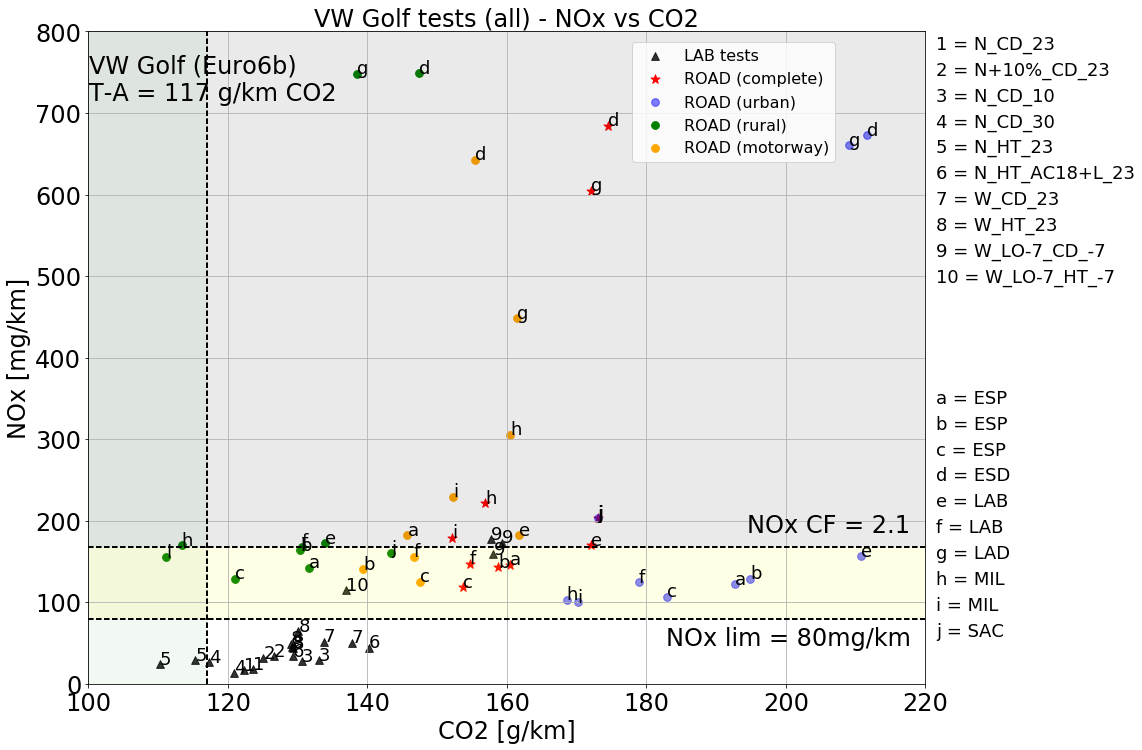

In [25]:
ax = lab.plot.scatter('CO2_lab', 'NOx_lab',marker='^', alpha=.8 ,s = 60, c = 'black', 
                      figsize = (15,12), grid ='on')
#plt.legend(lab.index, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#for ea in road.index:
road.plot.scatter('CO2_COMP','NOx_COMP', ax=ax, marker='*', s = 90, c = 'red', grid = 'on')
road.plot.scatter('CO2_URB','NOx_URB', ax=ax, s = 60, alpha=.5, c = 'blue', grid = 'on')
road.plot.scatter('CO2_RUR','NOx_RUR', ax=ax, s = 60, c = 'green', grid = 'on')
road.plot.scatter('CO2_MOT','NOx_MOT', ax=ax, s = 60, c = 'orange', grid = 'on')

legend = ('LAB tests','ROAD (complete)','ROAD (urban)','ROAD (rural)','ROAD (motorway)')
plt.legend(legend, fontsize = 16, loc = [0.65,0.8])

fontsize = 24
plt.ylabel('NOx [mg/km]', fontsize = fontsize)
plt.xlabel('CO2 [g/km]', fontsize = fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.title('VW Golf tests (all) - NOx vs CO2', fontsize = fontsize)
plt.axis([100,220,0,800])

for i, txt in enumerate(lab.ind2):
    if i<21:
        ax.annotate(txt.split('0')[1], (lab.CO2_lab.iat[i],lab.NOx_lab.iat[i]), ha = 'left', fontsize = 18)#, rotation = 30)
    else:
        ax.annotate(txt, (lab.CO2_lab.iat[i],lab.NOx_lab.iat[i]), ha = 'left', fontsize = 18)#, rotation = 30)
        
for i, txt in enumerate(road.ALPH):
    ax.annotate(txt + '', (road.CO2_COMP.iat[i],road.NOx_COMP.iat[i]), ha = 'left', fontsize = 18)
for i, txt in enumerate(road.ALPH):
    ax.annotate(txt + '', (road.CO2_URB.iat[i],road.NOx_URB.iat[i]), ha = 'left', fontsize = 18)
for i, txt in enumerate(road.ALPH):
    ax.annotate(txt + '', (road.CO2_RUR.iat[i],road.NOx_RUR.iat[i]), ha = 'left', fontsize = 18)
for i, txt in enumerate(road.ALPH):
    ax.annotate(txt + '', (road.CO2_MOT.iat[i],road.NOx_MOT.iat[i]), ha = 'left', fontsize = 18)
    
i = 1
for each in name.test:
    plt.gcf().text(0.91, 0.89 - 0.03*i, str(i) + ' = ' +  each, fontsize=18)  
    i = i+1

i = 0
for each in road.index:
    plt.gcf().text(0.91, 0.45 - 0.03*i, road.ALPH[i] + ' = ' + each.split('037_')[1].split('_2017')[0] , fontsize=18)
    i = i+1
    
plt.gcf().text(0.126, 0.8 , str('VW Golf (Euro6b) \nT-A = 117 g/km CO2'), fontsize=24)
plt.gcf().text(0.66, 0.17 , str('NOx lim = 80mg/km'), fontsize=24)
plt.gcf().text(0.735, 0.3 , str('NOx CF = 2.1'), fontsize=24)

plt.axvline(x=117, color='k', linestyle='--', linewidth=2 )
plt.axhline(y=80, color='k', linestyle='--', linewidth=2 )
plt.axhline(y=80*2.1, color='k', linestyle='--', linewidth=2 )
plt.axhspan(80, 80*2.1, facecolor='yellow', alpha=0.1)
plt.axhspan(80*2.1, 800, facecolor='0.2', alpha=0.1)
plt.axvspan(100, 117, facecolor='green', alpha=0.05)
        

## Plot Avg of repeated tests

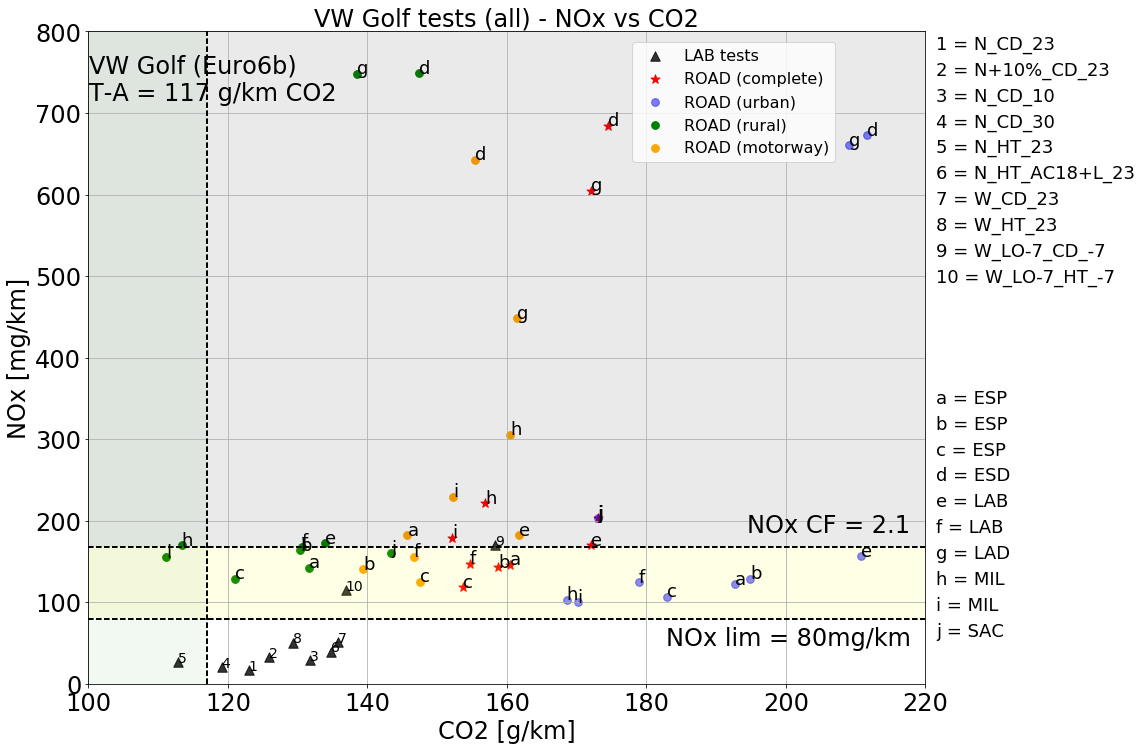

In [26]:
ax = name.plot.scatter('CO2_lab', 'NOx_lab',marker='^', alpha=.8 ,s = 90, c = 'black', 
                      figsize = (15,12), grid ='on')

road.plot.scatter('CO2_COMP','NOx_COMP', ax=ax, marker='*', s = 90, c = 'red', grid = 'on')
road.plot.scatter('CO2_URB','NOx_URB', ax=ax, s = 60, alpha=.5, c = 'blue', grid = 'on')
road.plot.scatter('CO2_RUR','NOx_RUR', ax=ax, s = 60, c = 'green', grid = 'on')
road.plot.scatter('CO2_MOT','NOx_MOT', ax=ax, s = 60, c = 'orange', grid = 'on')

legend = ('LAB tests','ROAD (complete)','ROAD (urban)','ROAD (rural)','ROAD (motorway)')
plt.legend(legend, fontsize = 16, loc = [0.65,0.8])

fontsize = 24
plt.ylabel('NOx [mg/km]', fontsize = fontsize)
plt.xlabel('CO2 [g/km]', fontsize = fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.title('VW Golf tests (all) - NOx vs CO2', fontsize = fontsize)
plt.axis([100,220,0,800])

for i, txt in enumerate(name.test):
    ax.annotate(i+1, (name.CO2_lab.iat[i],name.NOx_lab.iat[i]),
                ha = 'left', fontsize = 14, clip_on=True)#, rotation = 30)

for i, txt in enumerate(road.ALPH):
    ax.annotate(txt + '', (road.CO2_COMP.iat[i],road.NOx_COMP.iat[i]), ha = 'left', fontsize = 18, clip_on=True)
for i, txt in enumerate(road.ALPH):
    ax.annotate(txt + '', (road.CO2_URB.iat[i],road.NOx_URB.iat[i]), ha = 'left', fontsize = 18, clip_on=True)
for i, txt in enumerate(road.ALPH):
    ax.annotate(txt + '', (road.CO2_RUR.iat[i],road.NOx_RUR.iat[i]), ha = 'left', fontsize = 18, clip_on=True)
for i, txt in enumerate(road.ALPH):
    ax.annotate(txt + '', (road.CO2_MOT.iat[i],road.NOx_MOT.iat[i]), ha = 'left', fontsize = 18, clip_on=True)
    
i = 1
for each in name.test:
    plt.gcf().text(0.91, 0.89 - 0.03*i, str(i) + ' = ' +  each, fontsize=18)  
    i = i+1

i = 0
for each in road.index:
    plt.gcf().text(0.91, 0.45 - 0.03*i, road.ALPH[i] + ' = ' + each.split('037_')[1].split('_2017')[0] , fontsize=18)
    i = i+1
    
plt.gcf().text(0.126, 0.8 , str('VW Golf (Euro6b) \nT-A = 117 g/km CO2'), fontsize=24)
plt.gcf().text(0.66, 0.17 , str('NOx lim = 80mg/km'), fontsize=24)
plt.gcf().text(0.735, 0.3 , str('NOx CF = 2.1'), fontsize=24)

plt.axvline(x=117, color='k', linestyle='--', linewidth=2 )
plt.axhline(y=80, color='k', linestyle='--', linewidth=2 )
plt.axhline(y=80*2.1, color='k', linestyle='--', linewidth=2 )
plt.axhspan(80, 80*2.1, facecolor='yellow', alpha=0.1)
plt.axhspan(80*2.1, 800, facecolor='0.2', alpha=0.1)
plt.axvspan(100, 117, facecolor='green', alpha=0.05)